In [1]:
import sympy as sym
import numpy as np
from spherical_harmonic_functions.spherical_harmonics import *
from spherical_bessel_functions.spherical_bessel_functions import *

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm


In [2]:
n = 2
m = -1
l = 2

# Compute the formulas up to including l = 4
Y_l_m = spherical_harmonic_functions(4)
j_n = spherical_bessel_function_formulas(4)



In [3]:
# Example spherical harmonic formula with x,y and z on the unit sphere
Y_l_m[l][m]


-1.09254843059208*y*z

In [4]:
# Example spherical harmonic formula in spherical coordinates with longitude theta and latitude phi

theta = sym.symbols('theta')
phi = sym.symbols('phi')
x = sym.symbols('x')
y = sym.symbols('y')
z = sym.symbols('z')

Y_l_m[l][m].subs(
    x, sym.sin(theta)*sym.cos(phi)).subs(
    y, sym.sin(theta)*sym.sin(phi)).subs(
    z, sym.cos(theta))


-1.09254843059208*sin(phi)*sin(theta)*cos(theta)

In [5]:
# Complete wavefunction in spherical coordinates
# phi, theta and the distance to the origin r

j_n[n]*Y_l_m[l][m].subs(
    x, sym.sin(theta)*sym.cos(phi)).subs(
    y, sym.sin(theta)*sym.sin(phi)).subs(
    z, sym.cos(theta))

-1.09254843059208*(-r**2*sin(r) - 3*r*cos(r) + 3*sin(r))*sin(phi)*sin(theta)*cos(theta)/r**3

## Example Plot

In [7]:
# Define the functions
Y_func = sym.lambdify(['x','y','z'], Y_l_m[2][-2]) # x,y,z on the unit sphere
J_func = sym.lambdify('r', j_n[0]) # r the distance to the origin

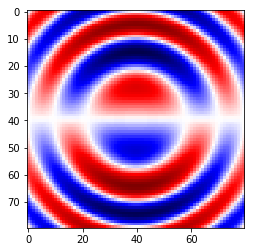

In [8]:
grid = np.linspace(-20,20,80)
x,y,z = np.meshgrid(grid,grid,grid)
r = (x**2+y**2+z**2)**0.5
result = Y_func(x/r,y/r,z/r)*J_func(r)
cmap = plt.get_cmap('seismic')
#norm = mpl.colors.Normalize(vmin=-0.15, vmax=0.15)
scalarMap = cm.ScalarMappable(norm=None, cmap=cmap)
plt.imshow(scalarMap.to_rgba(result[:,0,:]))